# Feature detection em OpenCV


Exemplos extraídos do tutorial  [Scipy4CV ministrado por Thiago Santos no Simpósio Brasileiro de Computação Gráfica e Processamento de Imagens](https://github.com/thsant/scipy4cv)


In [24]:
import cv2

import matplotlib.pyplot as plt

import matplotlib.cm as cm

from math import pi

%matplotlib inline


## Deteção de Features 2D

Neste exemplo as features do tipo GFTT, SIFT e SURF são calculadas na OpenCV




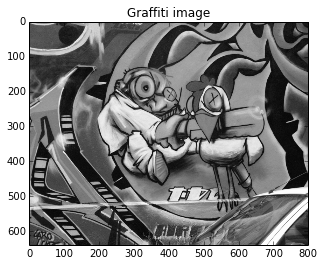

In [25]:
graffiti = cv2.imread('graffiti.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(graffiti, cmap=cm.gray)
plt.title('Graffiti image')

The OpenCV wrapper of the GFTT function returns 2D points as a NumPy array. The `plot` function in Matplotlib takes two lists (or arrays) containing respectively the points’ $x$
and $y$ coordinates:

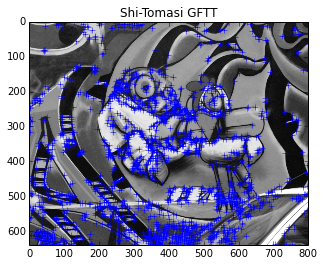

In [26]:
kpts = cv2.goodFeaturesToTrack(graffiti, 2000, 0.01, 3)
plt.plot(kpts[:,:,0], kpts[:,:,1], 'b+')
plt.imshow(graffiti, cmap=cm.gray)
plt.title('Shi-Tomasi GFTT')

In the code above, OpenCV’s GFTT will return up to 2000 corners (features), all of them at least 3 pixels appart. The 0.01 is a quality level parameter defined over the eigen values
(see [OpenCV’s documentation for details](http://docs.opencv.org/modules/imgproc/doc/feature_detection.html?highlight=goodfeaturestotrack#cv2.goodFeaturesToTrack)). The features are returned as a $2000 \times 1 \times 2$ array and slicing is used in the plotting function to recover the lists of $x$ and $y$ coordinates. The `b+` argument informs Matplotlib the points have to be plotted as blue crosses. Finally, imshow is employed to display the image.

- Features like SIFT and SURF are not "dimensionless"
- They are **multi-scale features** defined over a *neighborhood* 
- OpenCV's `Keypoint` structure represent these features
  - `Keypoint.pt` keeps the feature location
  - `Keypoint.size` keeps the diameter of the meaningful neighborhood

Differently of the GFTT features, SIFT and SURF are not dimensionless. They are [multi-scale features](http://dx.doi.org/10.1561/0600000017) and are defined over neighborhoods presenting different sizes. OpenCV represents these features using the `KeyPoint` data structure: the feature coordinates are stored in the `pt` variable and the neighborhood diameter in the `size` variable. The scatter function is able to take a list of sizes and plot the points as circular regions:

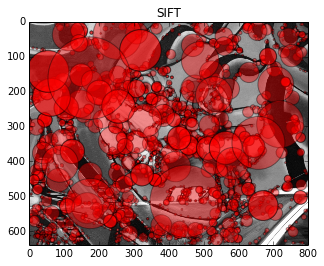

In [27]:
sift = cv2.SIFT()
kpts = sift.detect(graffiti)
x = [k.pt[0] for k in kpts]
y = [k.pt[1] for k in kpts]
# s will correspond to the neighborhood area
s = [(k.size/2)**2 * pi for k in kpts]
plt.scatter(x, y, s, c='r', alpha=0.4)
plt.imshow(graffiti, cmap=cm.gray)
plt.title('SIFT')

In the code above, the `alpha` parameter is employed to plot using a 40% transparency, allowing the viewer to see the image below the circles, and the `r` parameter asks for a
plotting in *red*.

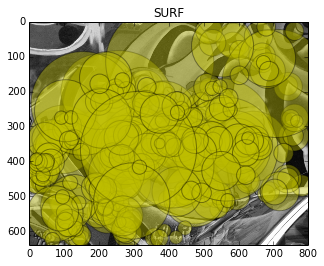

In [28]:
surf = cv2.SURF(hessianThreshold=7000)
kpts = surf.detect(graffiti)
x = [k.pt[0] for k in kpts]
y = [k.pt[1] for k in kpts]
s = [(k.size/2)**2 * pi for k in kpts]
plt.scatter(x, y, s, c='y', alpha=0.4)
plt.imshow(graffiti, cmap=cm.gray)
plt.title('SURF')